In [376]:
import dionysus as d
from pprint import pprint

# creating a $n$-dimensional simplex

below is an example of creating a 2 dimensional complex, checking the complex
and iterating of the vertex. We can also compute the boundary of the simplex
$$ \partial[v] = \sum_{n=1}^{i} (-1)^{i}[v_{1}, \cdots, \hat{v_{j}}, \cdots, v_{n}]$$

In [118]:
# A simplex is simply a list vertices. It's represented by the simplex Class:
simplex = d.Simplex([0,1,2,3])
print("Dimension:", s.dimension())
print("Simplex:", simplex)
index = 0
for simplicialBoundary in simplex.boundary():
    # set an index of the simplex
    simplicialBoundary.data = index
    print("boundary:", simplicialBoundary)
    for subSimplex in simplicialBoundary.boundary():
        subSimplex.data = index
        print("subBoundary:", subSimplex)
    index +=1
for vertex in simplex:
    ## iterating over vertex
    print("vertex:", vertex)
    
simplicialComplex = []

Dimension: 2
Simplex: <0,1,2,3> 0
boundary: <1,2,3> 0
subBoundary: <2,3> 0
subBoundary: <1,3> 0
subBoundary: <1,2> 0
boundary: <0,2,3> 1
subBoundary: <2,3> 1
subBoundary: <0,3> 1
subBoundary: <0,2> 1
boundary: <0,1,3> 2
subBoundary: <1,3> 2
subBoundary: <0,3> 2
subBoundary: <0,1> 2
boundary: <0,1,2> 3
subBoundary: <1,2> 3
subBoundary: <0,2> 3
subBoundary: <0,1> 3
vertex: 0
vertex: 1
vertex: 2
vertex: 3


# closure
we can generate all the subSimplicies or $k$-simplicies. For example, an 8-sphere is the 8-dimensional skeleton of the closure of the 9-simplex.

In [312]:
simplex4 = d.Simplex([0,1,2])
sphere1  = d.closure([simplex4], 2)
print(sphere1)

[<0,2> 0, <0,1> 0, <1,2> 0, <0> 0, <1> 0, <2> 0, <0,1,2> 0]


# filteration
A filtration is a nested sequence of simplicial complexes, 𝐾1⊆𝐾2⊆…⊆𝐾𝑛. Without loss of generality, we can assume that two consecutive complexes in the filtration differ by a single simplex, so we can think of a filtration as a sequence of simplices.

In [163]:
simplices = [([2], 4), ([1,2], 5), ([0,2], 6),
             ([0], 1),   ([1], 2), ([0,1], 3)]

filtration = d.Filtration()
for vertices, time in simplices:
    filtration.append(d.Simplex(vertices, time))
filtration.sort()

for simplex in filtration:
    print("simplex: ", simplex)
    
# look up the index of the gievn simplex (index starts at 0)
print("index of [1,2]: ", filtration.index(d.Simplex([1,2])))

simplex:  <0> 1
simplex:  <1> 2
simplex:  <0,1> 3
simplex:  <2> 4
simplex:  <1,2> 5
simplex:  <0,2> 6
index of [1,2]:  4


Persistent Homology

Applying homology functor to the filtration, we get a sequence of homology groups, connected by linear maps: 𝐻∗(𝐾1)→𝐻∗(𝐾2)→…→𝐻∗(𝐾𝑛)
. To compute decomposition of this sequence, i.e., persistence barcode, we use homology_persistence(), which returns its internal representation of the reduced boundary matrix:

In [172]:
matrixHomology = d.homology_persistence(filtration)
for index, chain in enumerate(matrixHomology):
    print('index: ', index)
    print('chain: ', chain)

index:  0
chain:  
index:  1
chain:  
index:  2
chain:  1*0 + 1*1
index:  3
chain:  
index:  4
chain:  1*1 + 1*3
index:  5
chain:  


We can manually extract the persistence pairing from the reduced matrix:
We can also use the init_diagrams() function, by providing it access to the filteraton

In [194]:
for index in range(len(matrixHomology)):
    if matrixHomology.pair(index) < index:
        continue
    dim = filtration[index].dimension()
    if matrixHomology.pair(index) != matrixHomology.unpaired:
        print("dimension, index, pair")
        print(dim, index, matrixHomology.pair(index))
    else:
        print('dimension, index')
        print(dim, index)

print(" ")
print("********************** next ***********************")
print(" ")
dgms = d.init_diagrams(matrixHomology, filtration)
print(dgms)
for index, dgm in enumerate(dgms):
    for pt in dgm:
        print("index, birth, death")
        print(index, pt.birth, pt.death)

print(" ")
print("H_1:                                                               pt6-->")
print("               pt2birth --> pt3death      pt4birth --> pt5death         " )         
print("H_0: pt0 -------------------------------------------------------------->")

dimension, index
0 0
dimension, index, pair
0 1 2
dimension, index, pair
0 3 4
dimension, index
1 5
 
********************** next ***********************
 
[Diagram with 3 points, Diagram with 1 points]
index, birth, death
0 1.0 inf
index, birth, death
0 2.0 3.0
index, birth, death
0 4.0 5.0
index, birth, death
1 6.0 inf
 
H_1:                                                               pt6-->
               pt2birth --> pt3death      pt4birth --> pt5death         
H_0: pt0 -------------------------------------------------------------->


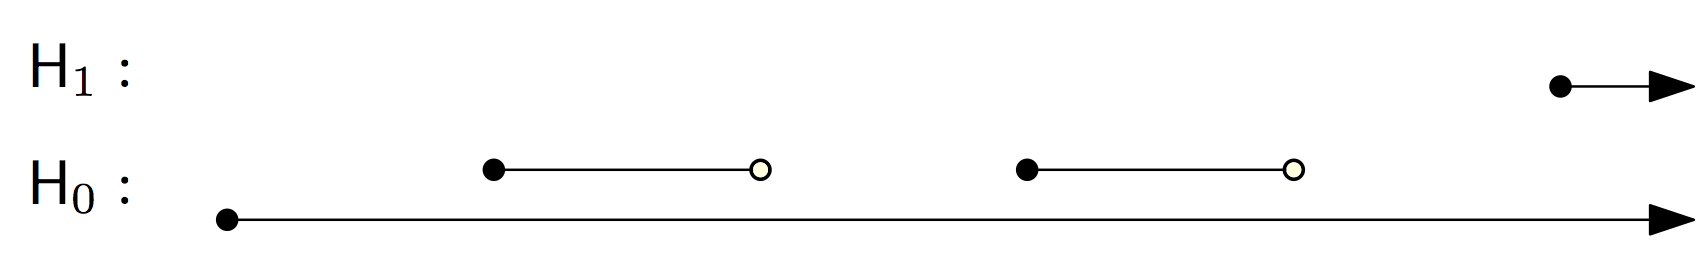

In [308]:
from IPython.display import Image
PATH = "/Users/krisanaya/repos/tda-gudhi/notebooks/img/"
Image(filename = PATH + "barcode.png", width=20000, height=500)

In [373]:
from itertools import combinations 
from itertools import chain
  
def rSubset(arr:list, r:int) -> list: 
    """
    :param arr is a python list
    :param r is an python int
    :return a subSet of the given list
    """
    return list(combinations(arr, r)) 
  
def SimplicialComplex(simplex:list) -> list:
    """
    builds a simplicial complex
    :param  list
    :return a list of the complex
    
    """
    complex = [list(map(list, rSubset(simplex, index + 1))) 
               for index, _ in enumerate(simplex)]
    merge_complex =  list(chain(*complex))
    return [d.Simplex(vertices) for vertices in merge_complex]

def persistencePairing(complex: list):
    """
    prints pairings of complexies
    :param complex 
    """
    filteration = d.Filtration(complex)
    filteration.sort()
    matrixHomology = d.homology_persistence(filtration)
    for index in range(len(matrixHomology)):
        if matrixHomology.pair(index) < index:
            continue
        dim = filtration[index].dimension()
        if matrixHomology.pair(index) != matrixHomology.unpaired:
            print(" ")
            print(f"******* Index-{index} *******")
            print("dimension: ", dim)
            print("index: ", index)
            print("pair: ", matrixHomology.pair(index))
            print(f"******* endIndex-{index} *******")
            print(" ")
        else:
            print(" ")
            print(f"******* Index-{index} *******")
            print("dimension: ", dim)
            print("index: ", index)
            print(f"******* endIndex-{index} *******")
            print(" ")
    

In [374]:
persistencePairing(sphere8)

 
******* Index-0 *******
dimension:  0
index:  0
******* endIndex-0 *******
 
 
******* Index-1 *******
dimension:  0
index:  1
pair:  10
******* endIndex-1 *******
 
 
******* Index-2 *******
dimension:  0
index:  2
pair:  11
******* endIndex-2 *******
 
 
******* Index-3 *******
dimension:  0
index:  3
pair:  12
******* endIndex-3 *******
 
 
******* Index-4 *******
dimension:  0
index:  4
pair:  13
******* endIndex-4 *******
 
 
******* Index-5 *******
dimension:  0
index:  5
pair:  14
******* endIndex-5 *******
 
 
******* Index-6 *******
dimension:  0
index:  6
pair:  15
******* endIndex-6 *******
 
 
******* Index-7 *******
dimension:  0
index:  7
pair:  16
******* endIndex-7 *******
 
 
******* Index-8 *******
dimension:  0
index:  8
pair:  17
******* endIndex-8 *******
 
 
******* Index-9 *******
dimension:  0
index:  9
pair:  18
******* endIndex-9 *******
 
 
******* Index-19 *******
dimension:  1
index:  19
pair:  55
******* endIndex-19 *******
 
 
******* Index-20 *******
d

******* endIndex-326 *******
 
 
******* Index-327 *******
dimension:  3
index:  327
pair:  453
******* endIndex-327 *******
 
 
******* Index-328 *******
dimension:  3
index:  328
pair:  454
******* endIndex-328 *******
 
 
******* Index-329 *******
dimension:  3
index:  329
pair:  455
******* endIndex-329 *******
 
 
******* Index-330 *******
dimension:  3
index:  330
pair:  456
******* endIndex-330 *******
 
 
******* Index-331 *******
dimension:  3
index:  331
pair:  457
******* endIndex-331 *******
 
 
******* Index-332 *******
dimension:  3
index:  332
pair:  458
******* endIndex-332 *******
 
 
******* Index-333 *******
dimension:  3
index:  333
pair:  459
******* endIndex-333 *******
 
 
******* Index-334 *******
dimension:  3
index:  334
pair:  460
******* endIndex-334 *******
 
 
******* Index-335 *******
dimension:  3
index:  335
pair:  461
******* endIndex-335 *******
 
 
******* Index-336 *******
dimension:  3
index:  336
pair:  462
******* endIndex-336 *******
 
 
*******

pair:  728
******* endIndex-602 *******
 
 
******* Index-603 *******
dimension:  4
index:  603
pair:  729
******* endIndex-603 *******
 
 
******* Index-604 *******
dimension:  4
index:  604
pair:  730
******* endIndex-604 *******
 
 
******* Index-605 *******
dimension:  4
index:  605
pair:  731
******* endIndex-605 *******
 
 
******* Index-606 *******
dimension:  4
index:  606
pair:  732
******* endIndex-606 *******
 
 
******* Index-607 *******
dimension:  4
index:  607
pair:  733
******* endIndex-607 *******
 
 
******* Index-608 *******
dimension:  4
index:  608
pair:  734
******* endIndex-608 *******
 
 
******* Index-609 *******
dimension:  4
index:  609
pair:  735
******* endIndex-609 *******
 
 
******* Index-610 *******
dimension:  4
index:  610
pair:  736
******* endIndex-610 *******
 
 
******* Index-611 *******
dimension:  4
index:  611
pair:  737
******* endIndex-611 *******
 
 
******* Index-612 *******
dimension:  4
index:  612
pair:  738
******* endIndex-612 *******


pair:  998
******* endIndex-962 *******
 
 
******* Index-963 *******
dimension:  6
index:  963
pair:  999
******* endIndex-963 *******
 
 
******* Index-964 *******
dimension:  6
index:  964
pair:  1000
******* endIndex-964 *******
 
 
******* Index-965 *******
dimension:  6
index:  965
pair:  1001
******* endIndex-965 *******
 
 
******* Index-966 *******
dimension:  6
index:  966
pair:  1002
******* endIndex-966 *******
 
 
******* Index-1003 *******
dimension:  7
index:  1003
pair:  1012
******* endIndex-1003 *******
 
 
******* Index-1004 *******
dimension:  7
index:  1004
pair:  1013
******* endIndex-1004 *******
 
 
******* Index-1005 *******
dimension:  7
index:  1005
pair:  1014
******* endIndex-1005 *******
 
 
******* Index-1006 *******
dimension:  7
index:  1006
pair:  1015
******* endIndex-1006 *******
 
 
******* Index-1007 *******
dimension:  7
index:  1007
pair:  1016
******* endIndex-1007 *******
 
 
******* Index-1008 *******
dimension:  7
index:  1008
pair:  1017
***

In [336]:
# let's create an 8sphere
simplex9 = d.Simplex([0,1,2,3,4,5,6,7,8,9])
sphere8  = d.closure([simplex9], 8)



Homology. Dionysus doesn’t compute homology directly, but we can get it as a by-product of persistent homology.

In [344]:
matrixHomology = d.homology_persistence(filtration, method = 'column')

In [375]:
filtration = d.Filtration(sphere8)
filtration.sort()
matrixHomology = d.homology_persistence(filtration, method='column')
dgms = d.init_diagrams(matrixHomology, filtration)
for index, dgm in enumerate(dgms):
    print("Dimension:", index)
    for pt in dgm:
        print("index, birth, death")
        print(index, pt.birth, pt.death)

Dimension: 0
index, birth, death
0 0.0 inf
Dimension: 1
Dimension: 2
Dimension: 3
Dimension: 4
Dimension: 5
Dimension: 6
Dimension: 7
Dimension: 8
index, birth, death
8 0.0 inf


In [352]:
dgms

[Diagram with 1 points,
 Diagram with 0 points,
 Diagram with 0 points,
 Diagram with 0 points,
 Diagram with 0 points,
 Diagram with 0 points,
 Diagram with 0 points,
 Diagram with 0 points,
 Diagram with 1 points]